# **1. Introduccion: En esta ocasión vamos a desarrollar un Modelo de Regresión Logistica, utilizaremos la data "CreditRisk" en archivo excel. La evaluación del riesgo crediticio permite predecir si un cliente tendrá problemas para cumplir con sus obligaciones financieras, para ello usaremos variables sociodemográficas y financieras.** ✅

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Cargar los datos desde un archivo CSV y delimitar punto y coma
df = pd.read_csv('creditrisk.csv', delimiter=';')

# Mostrar las primeras filas del dataset
df.head()



,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Risk
0,5037048,M,Y,Y,0,135000,Working,Secondary / secondary special,Married,With parents,44,8,1,0,0,0,2,0
1,5044630,F,Y,N,1,135000,Commercial associate,Higher education,Single / not married,House / apartment,27,4,1,0,0,0,2,0
2,5079079,F,N,Y,2,180000,Commercial associate,Secondary / secondary special,Married,House / apartment,35,15,1,0,0,0,4,0
3,5112872,F,Y,Y,0,360000,Commercial associate,Higher education,Single / not married,House / apartment,57,5,1,0,0,1,1,0
4,5105858,F,N,N,0,270000,Working,Secondary / secondary special,Separated,House / apartment,44,1,1,0,1,0,1,0


In [ ]:
# Descripción general de los datos
df.info()

# Resumen estadístico de las variables numéricas
df.describe()

# Comprobar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24257 entries, 0 to 24256
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   24257 non-null  int64 
 1   Gender               24257 non-null  object
 2   Has a car            24257 non-null  object
 3   Has a property       24257 non-null  object
 4   Children count       24257 non-null  int64 
 5   Income               24257 non-null  int64 
 6   Employment status    24257 non-null  object
 7   Education level      24257 non-null  object
 8   Marital status       24257 non-null  object
 9   Dwelling             24257 non-null  object
 10  Age                  24257 non-null  int64 
 11  Employment length    24257 non-null  int64 
 12  Has a mobile phone   24257 non-null  int64 
 13  Has a work phone     24257 non-null  int64 
 14  Has a phone          24257 non-null  int64 
 15  Has an email         24257 non-null  int64 
 16  Fami

,0
ID,0
Gender,0
Has a car,0
Has a property,0
Children count,0
Income,0
Employment status,0
Education level,0
Marital status,0
Dwelling,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Codificar variables categoricas

# Instanciar el codificador
le = LabelEncoder()

# Codificar todas las columnas categóricas
categorical_columns = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Verificamos los cambios
df.head()


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Risk
0,5037048,1,1,1,0,135000,4,4,1,5,44,8,0,0,0,0,2,0
1,5044630,0,1,0,1,135000,0,1,3,1,27,4,0,0,0,0,2,0
2,5079079,0,0,1,2,180000,0,4,1,1,35,15,0,0,0,0,4,0
3,5112872,0,1,1,0,360000,0,1,3,1,57,5,0,0,0,1,1,0
4,5105858,0,0,0,0,270000,4,4,2,1,44,1,0,0,1,0,1,0


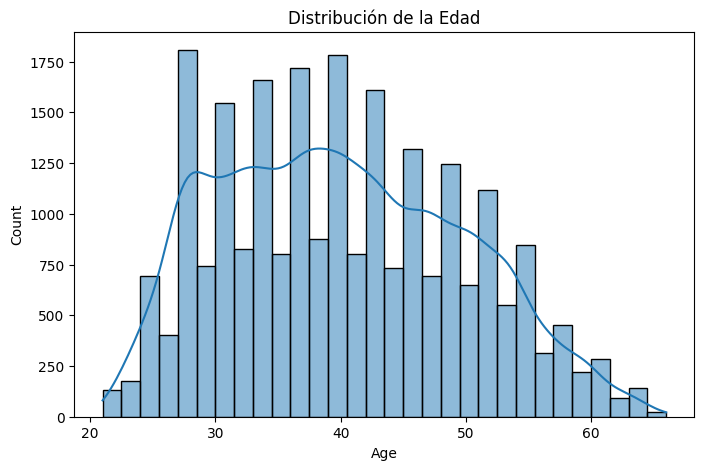

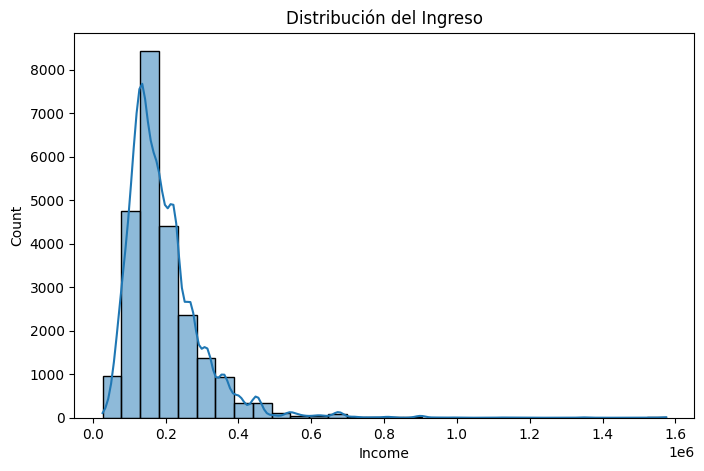

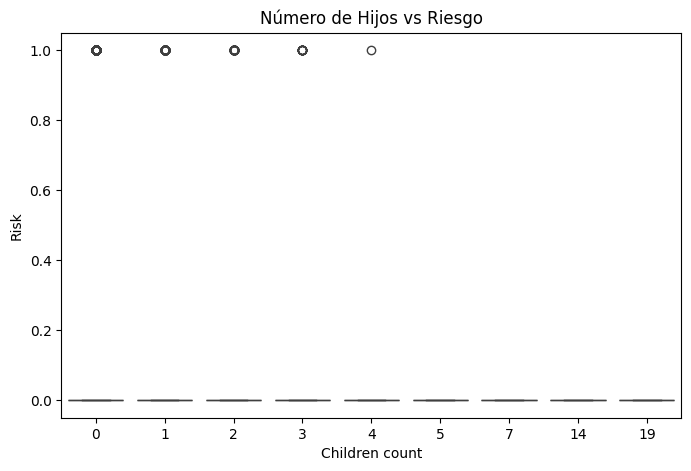

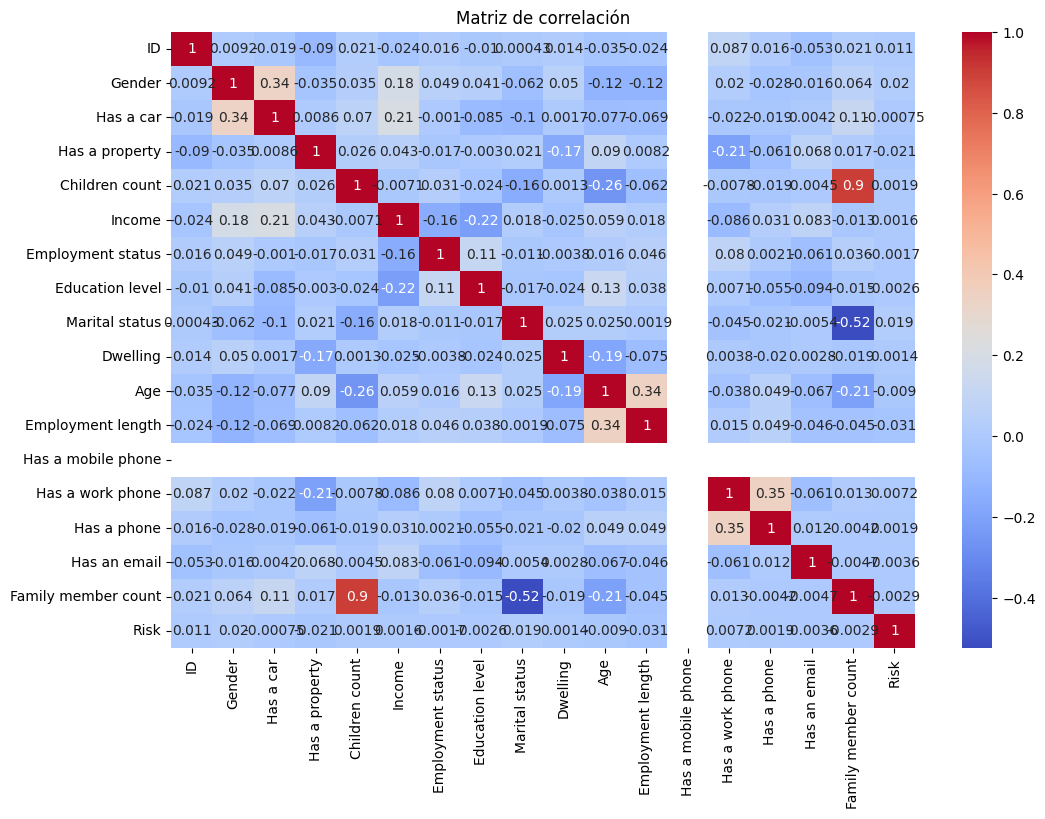

In [ ]:
# Distribución de la edad
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Distribución del ingreso
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribución del Ingreso')
plt.show()

# relación entre el número de hijos y el riesgo.
plt.figure(figsize=(8, 5))
sns.boxplot(x='Children count', y='Risk', data=df)
plt.title('Número de Hijos vs Riesgo')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


**1. Distribución de la Edad**
**Propósito**: Ver cómo se distribuyen los datos en términos de edad te permite identificar patrones o sesgos que podrían influir en el modelo. Por ejemplo, si hay una concentración de edades en ciertos rangos, el modelo puede estar más influenciado por ese grupo específico.
Importancia: Conocer la distribución es útil para ajustar el modelo de regresión, ya que puede indicar la necesidad de transformar la variable si está muy sesgada o tiene valores atípicos.

**2. Distribución del Ingreso**
**Propósito:** El ingreso es generalmente una variable clave en cualquier análisis financiero o de riesgo. Ver su distribución te permite detectar si los datos están sesgados o si hay valores extremos (outliers) que puedan afectar el modelo.
**Importancia**: Un sesgo en la distribución del ingreso puede alterar las predicciones. Si la distribución es asimétrica, puede ser necesario aplicar una transformación para estabilizar la varianza y mejorar el rendimiento del modelo.

**3. Relación entre el Número de Hijos y el Riesgo**

**Propósito**: Un gráfico como el boxplot permite visualizar cómo el número de hijos influye en el riesgo, mostrando la dispersión y posibles relaciones entre estas dos variables.
Importancia: Este gráfico ayuda a identificar correlaciones entre variables categóricas y el objetivo (riesgo), lo que es crucial para entender cómo ciertos factores familiares impactan en el riesgo y ajustar el modelo de acuerdo a ello.
**4. Matriz de Correlación**

**Propósito:** El heatmap de la matriz de correlación muestra cómo las diferentes variables están correlacionadas entre sí. Esto es fundamental para detectar relaciones lineales entre variables, lo cual es clave en regresión.
Importancia: Si ciertas variables están muy correlacionadas, puede ser un indicativo de multicolinealidad, lo que podría distorsionar los resultados del modelo de regresión. Además, te ayuda a identificar las variables más relevantes para predecir el riesgo.

Estos gráficos ayudan a entender mejorlos datos, sino que también permiten tomar decisiones informadas sobre qué transformaciones o modificaciones realizar antes de aplicar una regresión. Facilitan la identificación de patrones, relaciones entre variables y posibles problemas como la colinealidad o outliers, optimizando así el rendimiento del modelo.

In [ ]:
# División de los datos 80/20

from sklearn.model_selection import train_test_split

# Separar las características (X) de la variable objetivo (y)
X = df.drop('Risk', axis=1)
y = df['Risk']

# Dividir en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar formas de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((19405, 17), (4852, 17), (19405,), (4852,))

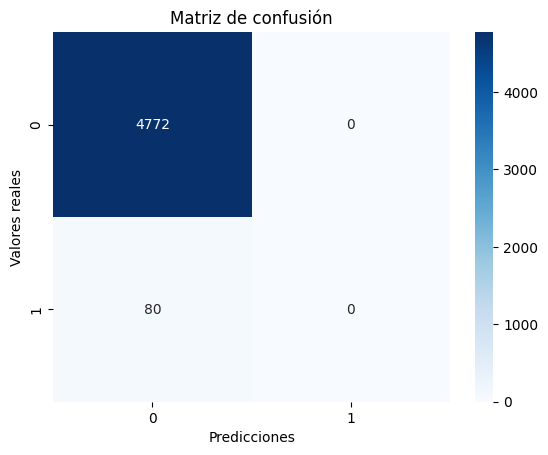

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4772
           1       0.00      0.00      0.00        80

    accuracy                           0.98      4852
   macro avg       0.49      0.50      0.50      4852
weighted avg       0.97      0.98      0.98      4852

Precisión del modelo: 98.35%
ROC-AUC Score: 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


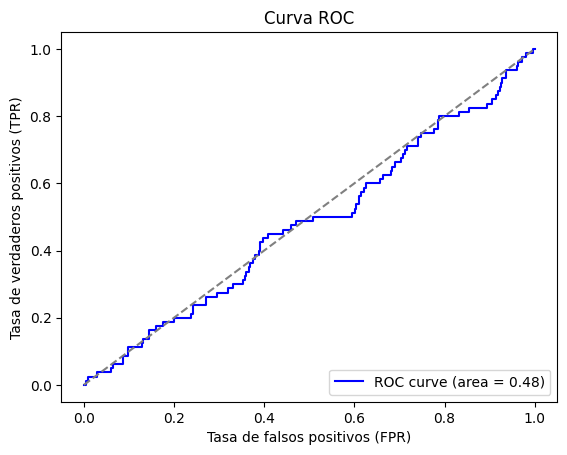

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# AUC-ROC
roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_score:.2f}')

# Gráfico ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


El modelo está funcionando bien en general, pero tiene un gran problema al predecir la clase minoritaria (los que no pagan, clase 1). Es por eso que ***la precisión y el recall para esa clase son 0.00. Esto podría deberse a un desbalance significativo en las clases.***

**El área bajo la curva ROC (AUC) de 0.48** es preocupante, ya que indica que el modelo no tiene una capacidad efectiva para distinguir entre las clases (quienes pagan y quienes no).

el desbalance de clases ocurre cuando una clase (por ejemplo, quienes no pagan) tiene muchas menos muestras que la otra (quienes pagan). Esto puede llevar a que el modelo aprenda a predecir solo la clase mayoritaria, ignorando la minoritaria, lo que resulta en un mal rendimiento en la predicción de la clase menos representada.

En consideración decidimos usar **SMOTE:** La cual consiste en la generación de Datos Sintéticos, a diferencia del undersampling, que elimina datos, SMOTE crea nuevas instancias sintéticas de la clase minoritaria, lo que ayuda a mantener más información del conjunto de datos original.


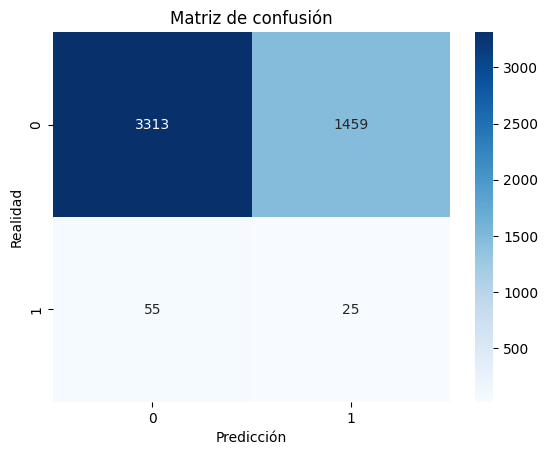

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      4772
           1       0.02      0.31      0.03        80

    accuracy                           0.69      4852
   macro avg       0.50      0.50      0.42      4852
weighted avg       0.97      0.69      0.80      4852

Precisión del modelo: 0.02


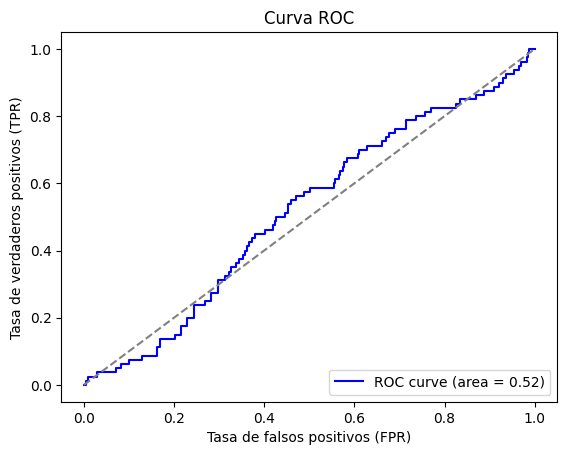

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que ya tienes tus datos cargados en X y y

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Predecir y evaluar
y_pred = model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular precisión
precision = precision_score(y_test, y_pred, zero_division=0)  # zero_division=0 evita advertencias si no hay predicciones de la clase positiva
print(f'Precisión del modelo: {precision:.2f}')

# Gráfico ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


**Analisis de resultados**

El modelo de regresión logística, a pesar de aplicar la técnica SMOTE para balancear las clases, muestra un desempeño muy bajo en la predicción de la clase minoritaria ("1").

 A continuación, algunos ***puntos clave del análisis***:

**Precisión extremadamente baja (0.02) para la clase "1"**, lo que indica que la mayoría de las predicciones positivas son incorrectas.
Recall de 0.31 para la clase minoritaria, lo que significa que solo identifica correctamente el 31% de los casos de "1".
**El F1-Score de 0.03** refleja la pobre capacidad del modelo para equilibrar precisión y recall en esta clase.
A pesar de que el modelo predice bien la clase mayoritaria, no es efectivo para la clase minoritaria, lo que puede ser un problema en escenarios donde esta clase es importante.


# Random Forest

**El objetivo es desarrollar un modelo predictivo de riesgo crediticio utilizando Random Forest después de haber experimentado con la regresión logística. Este tipo de problema se clasifica como una tarea de clasificación binaria en la que intentamos predecir si un cliente tendrá problemas para cumplir con sus obligaciones financieras, es decir, si pertenece a la clase de "alto riesgo" (1) o "bajo riesgo" (0).**

**1. Cargar y preparar los datos**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Separar características y variable objetivo
X = df.drop(columns=['Risk'])
y = df['Risk']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir el modelo con ajuste de pesos
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Validación cruzada
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # Cambia el número de folds si es necesario
print("\nPrecisión promedio con validación cruzada:", cv_scores.mean())


Matriz de confusión:
[[4727   43]
 [  69   13]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4770
           1       0.23      0.16      0.19        82

    accuracy                           0.98      4852
   macro avg       0.61      0.57      0.59      4852
weighted avg       0.97      0.98      0.97      4852


Precisión promedio con validación cruzada: 0.9779445361296734


In [ ]:
# Resumen de Resultados
summary_results = {
    "Métrica": [
        "Precisión General",
        "Matriz de Confusión",
        "Precisión Clase 0",
        "Recall Clase 0",
        "F1-Score Clase 0",
        "Precisión Clase 1",
        "Recall Clase 1",
        "F1-Score Clase 1",
        "Precisión Promedio con Validación Cruzada"
    ],
    "Valor": [
        "98%",
        "[[4727, 43], [69, 13]]",
        "99%",
        "99%",
        "99%",
        "23%",
        "16%",
        "19%",
        "97.79%"
    ]
}

import pandas as pd

# Convertir a DataFrame para mostrar
results_df = pd.DataFrame(summary_results)
results_df


,Métrica,Valor
0,Precisión General,98%
1,Matriz de Confusión,"[[4727, 43], [69, 13]]"
2,Precisión Clase 0,99%
3,Recall Clase 0,99%
4,F1-Score Clase 0,99%
5,Precisión Clase 1,23%
6,Recall Clase 1,16%
7,F1-Score Clase 1,19%
8,Precisión Promedio con Validación Cruzada,97.79%


**Analisis de resultados**

El modelo presenta una ***alta precisión general, pero la efectividad en la identificación de casos de riesgo (Clase 1) es insuficiente***.

**Desbalance de Clases:** A pesar de los esfuerzos por ajustar pesos y aplicar técnicas de validación cruzada, el desbalance en la distribución de las clases sigue siendo un reto significativo.

**Implicaciones:** La baja capacidad para predecir correctamente los casos de riesgo sugiere que es esencial explorar métodos adicionales para mejorar la detección y gestión del riesgo.

Hemos probado este modelo de clasificación para identificar riesgos utilizando un conjunto de datos desbalanceado. A pesar de que la precisión general del modelo alcanzó niveles satisfactorios (98%), la evaluación detallada mediante la matriz de confusión y el reporte de clasificación reveló desafíos significativos en la identificación de la clase minoritaria (casos de riesgo).

Los resultados evidencian que, ***aunque el modelo es efectivo para clasificar la mayoría de las instancias, su desempeño en la predicción de casos de riesgo es inadecuado, con una precisión de solo el 23% y un recall del 16% para esta clase. Esto plantea un problema crítico***, ya que la incapacidad para identificar correctamente los casos de riesgo puede tener implicaciones serias en la toma de decisiones.

Las técnicas aplicadas, como el ajuste de pesos y la validación cruzada, proporcionaron un marco robusto para mejorar el modelo. Sin embargo, se sugiere considerar enfoques adicionales, como el uso de algoritmos más avanzados, la recolección de más datos de la clase minoritaria, o incluso técnicas de sobremuestreo y submuestreo para abordar el desbalance de clases de manera más efectiva.

 **En Conclusión**

Aunque el modelo **es efectivo para clasificar la mayoría de las instancias, su desempeño en la predicción de casos de riesgo sigue siendo limitado, con una precisión del 23% y un recall del 16% para esta clase** *texto en cursiva*. Este rendimiento indica que el modelo aún enfrenta desafíos significativos en la identificación de la clase minoritaria. Dado el análisis y los ajustes aplicados hasta ahora, se ha decidido, por el momento, no probar métodos más avanzados o complejos. Estos enfoques adicionales quedarán para una futura oportunidad, mientras que en esta fase me quedaré con los modelos y técnicas evaluadas